# TextMising
**Descripción:** Este notebook realiza un analisis de texto de los textos: (Sherlock Holmes y Economia Digital).
Incluye: Un proceso completo de minería y procesamiento del lenguaje natural, que abarca desde la descarga y limpieza de los textos hasta su análisis cuantitativo y visualización de resultados.

In [11]:
!python3 -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.8 MB 536 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [14]:
!pip install spacy==3.7.5
!pip install nltk==3.8.1
!pip install textblob==0.17.1
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [15]:
import re
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

/Users/user/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [33]:
# Descargar y guardar textos
import requests
from pathlib import Path

# Crear carpeta de salida
OUT = Path("texts_mineria")
OUT.mkdir(exist_ok=True)

urls = {
    # Texto 1: clásico de literatura
    "sherlock_gutenberg": "https://www.gutenberg.org/cache/epub/1661/pg1661.txt",
    
    # Texto 2: Economía Digital (artículo real de FORMTICMX)
    "economia_digital": "https://formticmx.com/economia-digital-produccion-y-consumo-en-el-siglo-xxi/"
}
for key, u in urls.items():
    print("Descargando", key)
    r = requests.get(u)
    r.encoding = r.apparent_encoding
    p = OUT / (key + ".txt")
    p.write_text(r.text, encoding="utf-8")
    print("Guardado:", p.as_posix(), "tamaño:", len(r.text))

print("Listo.")


Descargando sherlock_gutenberg
Guardado: texts_mineria/sherlock_gutenberg.txt tamaño: 593870
Descargando economia_digital
Guardado: texts_mineria/economia_digital.txt tamaño: 267456
Listo.


In [34]:
from pathlib import Path

OUT = Path("texts_mineria")
print("Archivos en texts_mineria:\n", list(OUT.glob("*.txt")))


Archivos en texts_mineria:
 [PosixPath('texts_mineria/economia_digital.txt'), PosixPath('texts_mineria/sherlock_gutenberg.txt')]


In [35]:
# Cargar y normalizar textos
files = {"Sherlock":Path("texts_mineria/sherlock_gutenberg.txt"), "Economia":Path("texts_mineria/economia_digital.txt")}
def normalize_basic(text):
    text = re.sub(r'<[^>]+>', ' ', text)
    text = re.sub(r'http\S+|www\.\S+', ' ', text)
    text = ''.join(ch if ord(ch) < 128 else ' ' for ch in text)
    text = re.sub(r'[\"\#\$%&\(\)\*\+,/:;<=>@\[\\\]^_`\{|\}~]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
texts = {}
for name,p in files.items():
    raw = p.read_text(encoding="utf-8")
    norm = normalize_basic(raw)
    texts[name] = {"raw": raw, "norm": norm}
    print(name, "chars raw", len(raw), "normalized", len(norm))

Sherlock chars raw 581564 normalized 563605
Economia chars raw 267456 normalized 166968


In [36]:
# Descripción sin spaCy (párrafos, oraciones, palabras) usando NLTK
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import re, pandas as pd
report = {}
for name,data in texts.items():
    raw = data["raw"]
    paragraphs = [p.strip() for p in re.split(r'\n{2,}', raw) if p.strip()]
    sentences = sent_tokenize(data["norm"])
    words = word_tokenize(data["norm"])
    report[name] = {"paragraphs":len(paragraphs), "sentences":len(sentences), "words":len(words), "avg_sentence_len_words": sum(len(word_tokenize(s)) for s in sentences)/max(1,len(sentences))}
df = pd.DataFrame(report).T
df = df[["paragraphs","sentences","words","avg_sentence_len_words"]]
df.style.format("{:.1f}", subset=["avg_sentence_len_words"])

,paragraphs,sentences,words,avg_sentence_len_words
Sherlock,2600.000000,6918.000000,115256.000000,16.7
Economia,2.000000,72.000000,24636.000000,342.2


In [24]:
!python3 -m spacy download es_core_news_sm
!python3 -m spacy download en_core_web_sm


/Users/user/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 1.9 MB/s  0:00:06m0:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
/Users/user/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.5 MB/s  0:00:08m0:00:0100:01
✔ Download and insta

Top 20 lemmas Sherlock
say 509
holmes 466
come 345
man 343
know 273
little 269
think 243
find 203
room 200
hand 199
see 185
look 185
shall 171
time 167
good 162
tell 156
day 152
door 151
hear 150
matter 145

Top 20 lemmas Economia
color 494
font 483
column 428
content 342
margin 304
width 251
background 210
menu 205
leave 196
button 189
text 176
container 176
padding 175
display 174
right 169
transform 168
audio 166
layout 165
important 164
dark 158



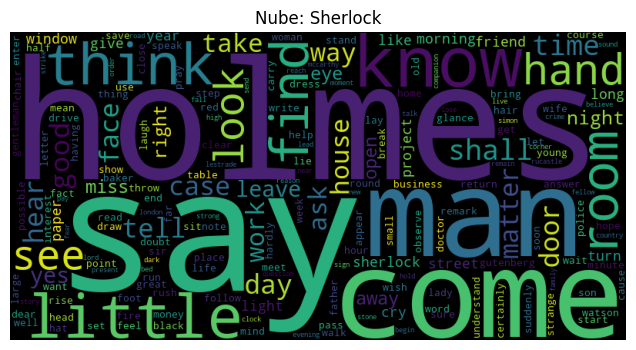

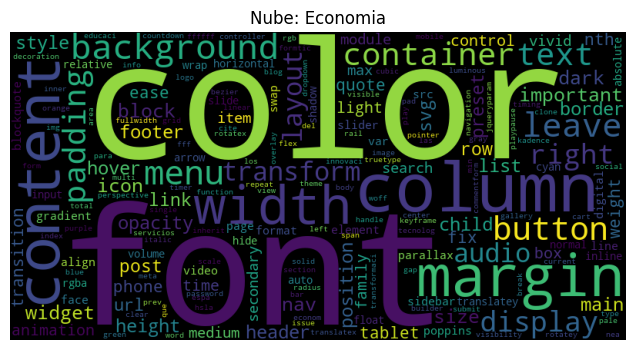

In [37]:
# spaCy procesamiento: tokenización, lematización, stopwords y frecuencias
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")
processed = {}
for name,data in texts.items():
    doc = nlp(data["norm"])
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop and len(token.lemma_)>2]
    freq = Counter(lemmas)
    processed[name] = {"doc":doc, "lemmas":lemmas, "freq":freq}
for name,p in processed.items():
    print("Top 20 lemmas", name)
    for w,c in p["freq"].most_common(20):
        print(w,c)
    print()
# Nubes
for name,p in processed.items():
    wc = WordCloud(width=800, height=400, collocations=False).generate_from_frequencies(p["freq"])
    plt.figure(figsize=(10,4)); plt.title("Nube: "+name); plt.imshow(wc); plt.axis('off'); plt.show()

===  Sherlock ===
NOUN [('holmes', 466), ('man', 343), ('room', 200), ('hand', 188), ('time', 167), ('day', 152), ('door', 151), ('matter', 144), ('case', 141), ('house', 133)]


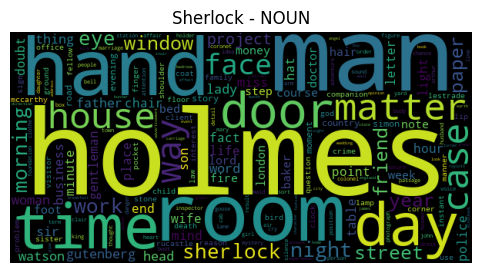

VERB [('say', 509), ('come', 345), ('know', 273), ('think', 243), ('find', 203), ('see', 185), ('look', 164), ('tell', 156), ('go', 154), ('hear', 148)]


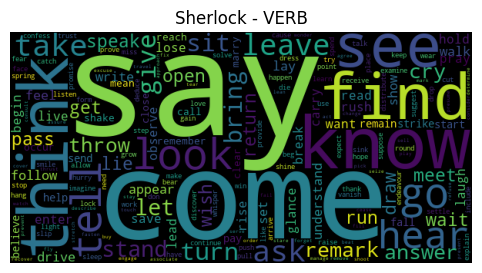

ADJ [('little', 262), ('good', 156), ('small', 85), ('old', 80), ('young', 80), ('great', 71), ('long', 56), ('large', 52), ('right', 50), ('possible', 50)]


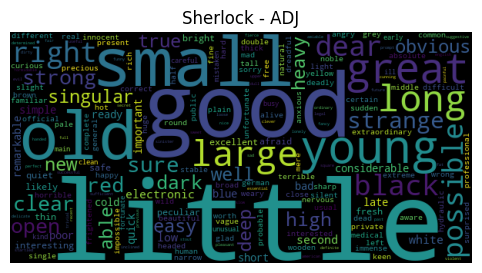

===  Economia ===
NOUN [('color', 492), ('column', 428), ('content', 335), ('margin', 304), ('background', 210), ('button', 189), ('menu', 188), ('text', 176), ('container', 175), ('padding', 174)]


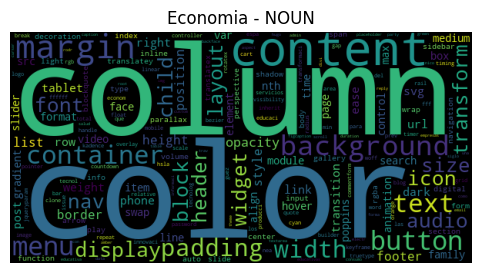

VERB [('leave', 196), ('fix', 83), ('width', 65), ('hide', 46), ('pad', 36), ('cite', 28), ('control', 20), ('float', 19), ('menu', 17), ('transform', 16)]


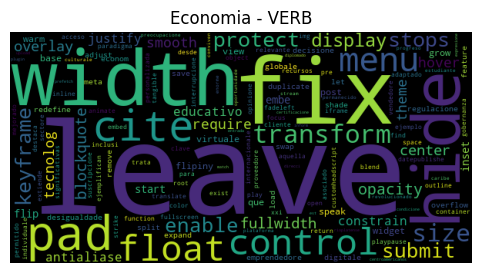

ADJ [('font', 351), ('important', 159), ('main', 131), ('preset', 92), ('right', 79), ('secondary', 66), ('vivid', 63), ('dark', 53), ('normal', 50), ('hover', 42)]


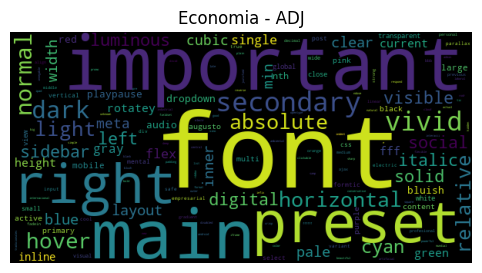

In [38]:
# POS tagging y nubes por categoría (NOUN, VERB, ADJ)
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
for name,p in processed.items():
    doc = p["doc"]
    pos_buckets = defaultdict(Counter)
    for token in doc:
        if not token.is_alpha or token.is_stop or len(token.text)<=2:
            continue
        if token.pos_ in ('NOUN','PROPN'):
            pos_buckets['NOUN'][token.lemma_.lower()] += 1
        elif token.pos_ == 'VERB':
            pos_buckets['VERB'][token.lemma_.lower()] += 1
        elif token.pos_ == 'ADJ':
            pos_buckets['ADJ'][token.lemma_.lower()] += 1
    print("=== ", name, "===")
    for cat in ['NOUN','VERB','ADJ']:
        print(cat, pos_buckets[cat].most_common(10))
        if pos_buckets[cat]:
            wc = WordCloud(width=600,height=300,collocations=False).generate_from_frequencies(pos_buckets[cat])
            plt.figure(figsize=(8,3)); plt.title(f"{name} - {cat}"); plt.imshow(wc); plt.axis('off'); plt.show()

In [39]:
# Extracción simple SVO usando parseo de dependencias de spaCy
def extract_svo(doc):
    svos = []
    for sent in doc.sents:
        for token in sent:
            if token.dep_.endswith('subj') and token.head.pos_ == 'VERB':
                subj = token.text
                verb = token.head.lemma_
                obj = None
                for child in token.head.children:
                    if child.dep_.endswith('obj'):
                        obj = child.text
                        svos.append((subj, verb, obj))
    return svos

for name,p in processed.items():
    svos = extract_svo(p["doc"])
    print(name, "SVO found:", len(svos))
    for s in svos[:20]:
        print(" ", s)
    print()

Sherlock SVO found: 3868
  ('it', 'give', 'it')
  ('volunteer', 'EBOOK', 'ADVENTURES')
  ('START', 'EBOOK', 'ADVENTURES')
  ('him', 'mention', 'her')
  ('I', 'take', 'it')
  ('I', 'take', 'reasoning')
  ('world', 'see', 'that')
  ('he', 'place', 'himself')
  ('reasoner', 'admit', 'intrusions')
  ('which', 'throw', 'doubt')
  ('I', 'see', 'little')
  ('marriage', 'drift', 'us')
  ('who', 'loathe', 'form')
  ('I', 'hear', 'account')
  ('he', 'accomplish', 'which')
  ('I', 'share', 'which')
  ('I', 'know', 'little')
  ('way', 'lead', 'me')
  ('I', 'pass', 'door')
  ('he', 'employ', 'powers')

Economia SVO found: 489
  ('jQuery', 'function', 'return')
  ('window.jQuery', 'return', 'window.jQuery')
  ('consumo', 'datepublishe', 'mainEntityOfPage')
  ('XXI', 'datepublishe', 'mainEntityOfPage')
  ('Siglo', 'xxi', 'articleSection')
  ('Siglo', 'xxi', 'consumo')
  ('que', 'redefine', 'forma')
  ('producci', 'educativo', 'description')
  ('y', 'emprendedore', 'publisher')
  ('servicios', 'educat

In [16]:
from pathlib import Path
import re

# --- Definir los archivos ---
files = {
    "Sherlock": Path("texts_mineria/sherlock_gutenberg.txt"),
    "economia_digital": Path("texts_mineria/economia_digital.txt")
}

# --- Función para limpiar el texto ---
def normalize_basic(text):
    text = re.sub(r'<[^>]+>', ' ', text)
    text = re.sub(r'http\S+|www\.\S+', ' ', text)
    text = ''.join(ch if ord(ch) < 128 else ' ' for ch in text)
    text = re.sub(r'[\"\#\$%&\(\)\*\+,/:;<=>@\[\\\]^_`\{|\}~]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# --- Cargar los textos ---
texts = {}
for name, p in files.items():
    raw = p.read_text(encoding="utf-8")
    norm = normalize_basic(raw)
    texts[name] = {"raw": raw, "norm": norm}
    print(f"✅ {name} cargado: {len(norm)} caracteres normalizados.")


✅ Sherlock cargado: 563605 caracteres normalizados.
✅ economia_digital cargado: 166968 caracteres normalizados.


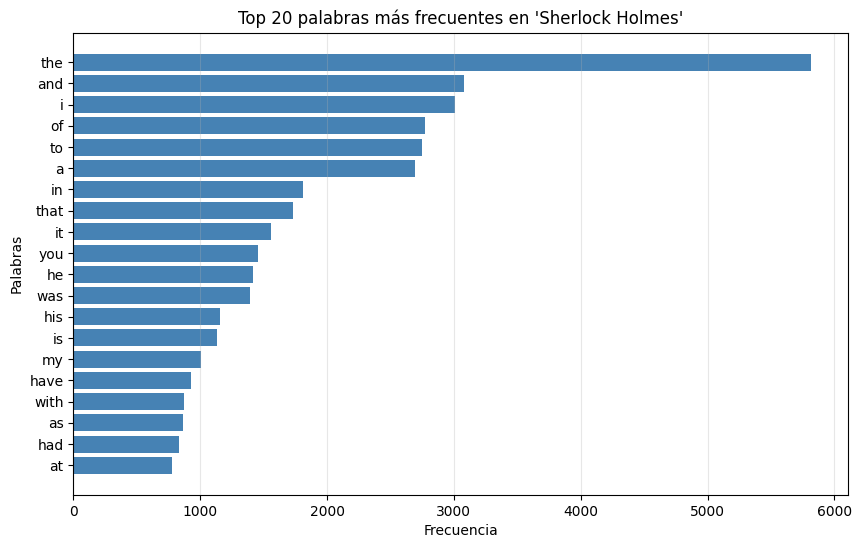

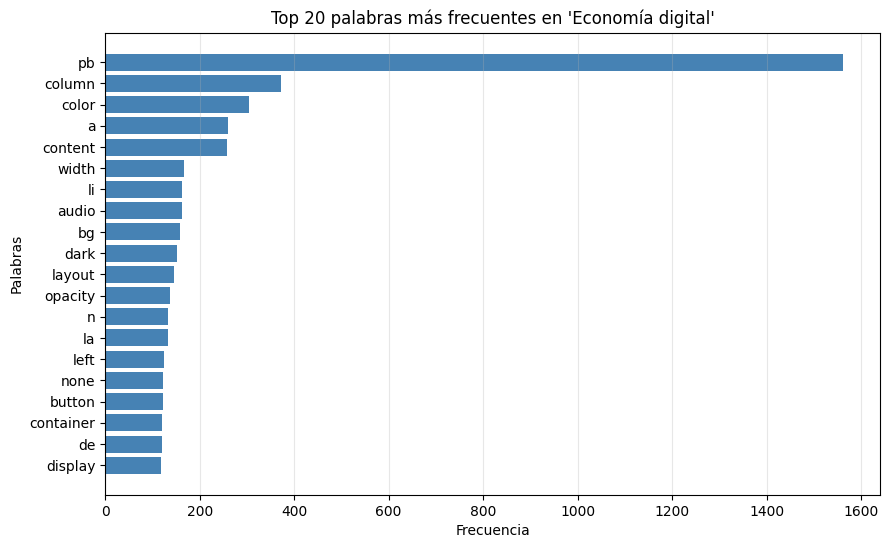

In [17]:
from collections import Counter
import matplotlib.pyplot as plt

def graficar_frecuencia_palabras(texto, titulo, n=20):
    tokens = [t.lower() for t in texto.split() if t.isalpha()]
    conteo = Counter(tokens)
    comunes = conteo.most_common(n)

    palabras, frecuencias = zip(*comunes)

    plt.figure(figsize=(10,6))
    plt.barh(palabras[::-1], frecuencias[::-1], color='steelblue')
    plt.title(f"Top {n} palabras más frecuentes en '{titulo}'")
    plt.xlabel("Frecuencia")
    plt.ylabel("Palabras")
    plt.grid(axis='x', alpha=0.3)
    plt.show()

# --- Aplicar a tus textos ---
graficar_frecuencia_palabras(texts["Sherlock"]["norm"], "Sherlock Holmes")
graficar_frecuencia_palabras(texts["economia_digital"]["norm"], "Economía digital")

  